In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_excel('Data_clean/Alta_sensors/2P01_combined.xlsx')

In [37]:
df['Count'].max()

643.0

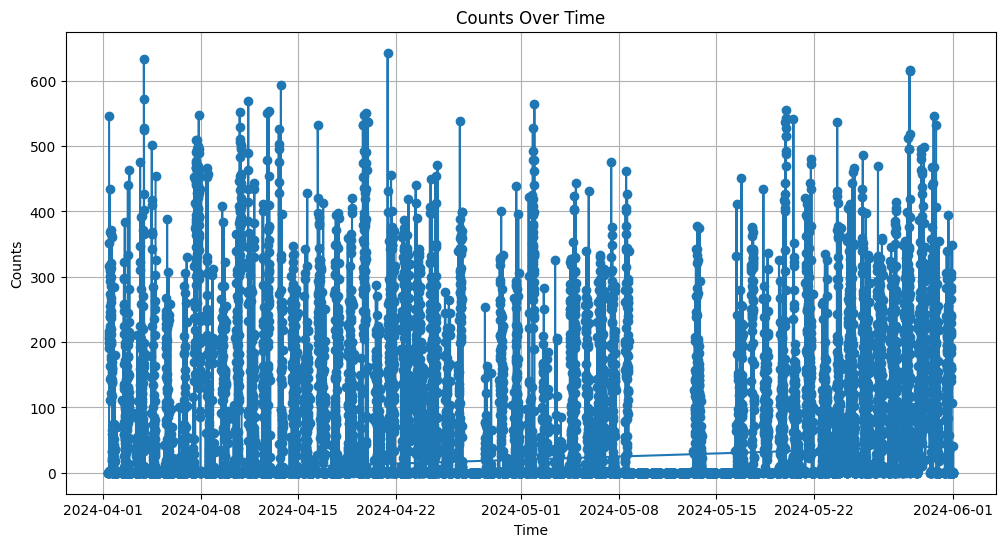

In [38]:
df['Date'] = pd.to_datetime(df['Date'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Count'], marker='o')
plt.title('Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

In [19]:
df.set_index('Date', inplace=True)

# Group by each day
daily_groups = df.groupby(df.index.date)

# Create a plot for each day
for date, group in daily_groups:
    plt.figure(figsize=(12, 6))
    plt.plot(group.index.time, group['Count'], marker='o')
    plt.title(f'Counts Over Time for {date}')
    plt.xlabel('Time')
    plt.ylabel('Counts')
    plt.grid(True)
    plt.show()


KeyError: "None of ['Date'] are in the columns"

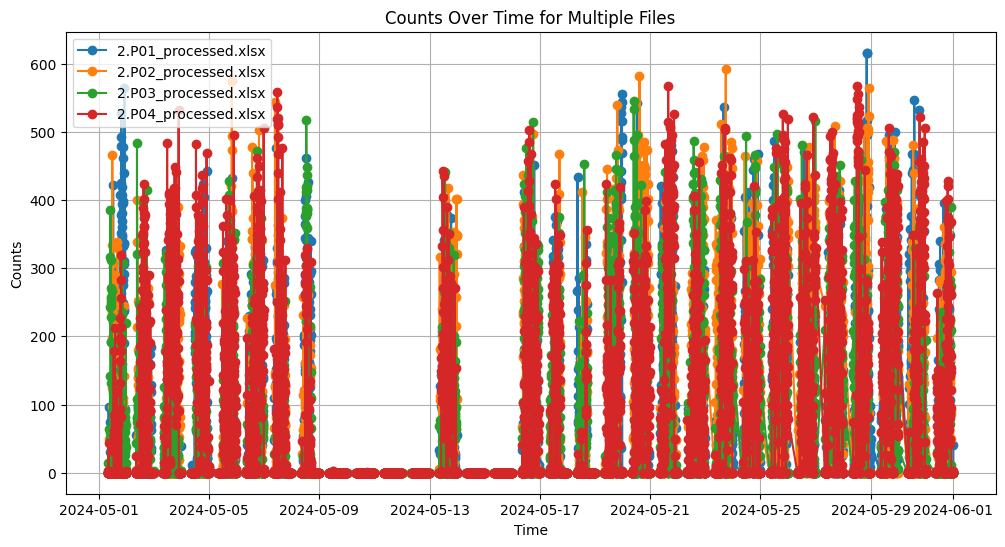

In [20]:
file_paths = ['Data_clean/Alta_sensors/2.P01_processed.xlsx', 'Data_clean/Alta_sensors/2.P02_processed.xlsx', 
              'Data_clean/Alta_sensors/2.P03_processed.xlsx', 'Data_clean/Alta_sensors/2.P04_processed.xlsx']

# Initialize an empty DataFrame to store combined data
combined_df = pd.DataFrame()

# Load each file and concatenate the data
for file_path in file_paths:
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df['Date'] = pd.to_datetime(df['Date'])
    df['Source'] = file_path.split('/')[-1]  # Add a column to identify the source file
    combined_df = pd.concat([combined_df, df])

# Plot the combined data
plt.figure(figsize=(12, 6))
for source, group in combined_df.groupby('Source'):
    plt.plot(group['Date'], group['Count'], marker='o', label=source)

plt.title('Counts Over Time for Multiple Files')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.show()

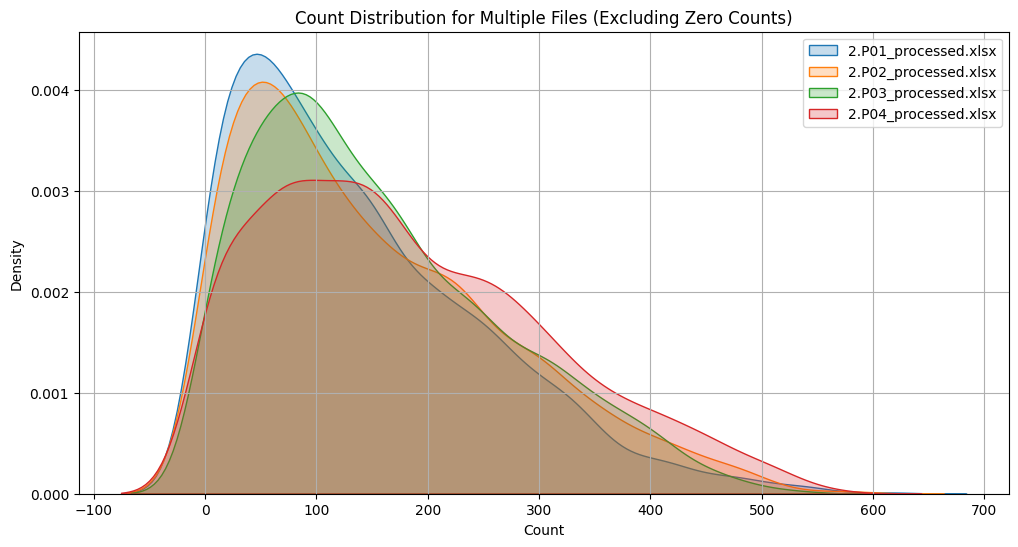

In [29]:
plt.figure(figsize=(12, 6))

# Load each file and create a KDE plot for counts excluding zero counts
for file_path in file_paths:
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Exclude zero counts
    df = df[df['Count'] != 0]
    
    # Plot KDE
    sns.kdeplot(df['Count'], label=file_path.split('/')[-1], fill=True)

# Plot formatting
plt.title('Count Distribution for Multiple Files (Excluding Zero Counts)')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()